In [107]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pysentimiento import create_analyzer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from tqdm import tqdm

### Utility functions

In [97]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

def create_analyzers(lang="en"):
    sentiment_analyzer = create_analyzer(task="sentiment", lang=lang)
    emotion_analyzer = create_analyzer(task="emotion", lang=lang)
    hate_speech_analyzer = create_analyzer(task="hate_speech", lang=lang)

    return sentiment_analyzer, emotion_analyzer, hate_speech_analyzer

### Data analysis

In [ ]:
sentiment_analyzer, emotion_analyzer, hate_speech_analyzer = create_analyzers()

In [99]:
# import the clean dataset as a pandas dataframe
df = pd.read_csv('datasets/cleaned_steam_reviews.csv')

In [100]:
# get the games by review count
games = df['app_name'].value_counts()

# filter out games with less than 1000 reviews
games = games[games > 1000]

# drop all games but these from the original dataframe
reviews = df[df['app_name'].isin(games.index)]
print(reviews.shape)

# get small substet of the dataset (1%)
reviews = reviews.sample(frac=0.01, random_state=123)
print(reviews.shape)

# get the review texts
review_texts = reviews['review_text']

(3291235, 6)
(32912, 6)


In [101]:
# Sample a few texts and analyze them
review_texts_sample = review_texts.sample(100)

for text in review_texts_sample:
    sentiment = sentiment_analyzer.predict(text)
    emotion = emotion_analyzer.predict(text)
    hate_speech = hate_speech_analyzer.predict(text)

    print(f"Text: {text}")
    print(f"Sentiment: {sentiment}")
    print(f"Emotion: {emotion}")
    print(f"Hate speech: {hate_speech}")
    print()


Text: Best card battle game since Culdcept Saga. Deep, original, fun.
Sentiment: AnalyzerOutput(output=POS, probas={POS: 0.991, NEU: 0.008, NEG: 0.002})
Emotion: AnalyzerOutput(output=joy, probas={joy: 0.925, others: 0.067, surprise: 0.003, anger: 0.002, disgust: 0.001, fear: 0.001, sadness: 0.001})
Hate speech: AnalyzerOutput(output=[], probas={hateful: 0.015, targeted: 0.012, aggressive: 0.010})

Text: This game launched a unplayable mess, with stuttering and a frame rate that could not even handle the intro. Its shameful you thought it was acceptable to launch it is this state. Do us all a favour and don't let the team handling the pc port near anymore ports. put aside that money and hire a team that actully gives a ****.
Sentiment: AnalyzerOutput(output=NEG, probas={NEG: 0.978, NEU: 0.020, POS: 0.003})
Emotion: AnalyzerOutput(output=disgust, probas={disgust: 0.974, anger: 0.016, others: 0.005, sadness: 0.002, fear: 0.001, surprise: 0.001, joy: 0.001})
Hate speech: AnalyzerOutput(ou

In [ ]:
for text in review_texts:
    hate_speech = hate_speech_analyzer.predict(text)

    if len(hate_speech.output) > 0:
        print(f"Text: {text}")
        print(f"Hate speech: {hate_speech}")
        print()

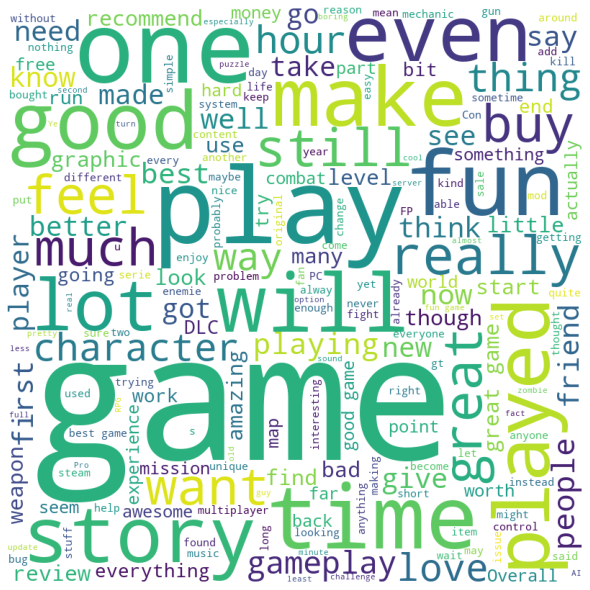

In [103]:
# make wordcloud from the review texts
all_texts = ' '.join(review_texts)

generate_wordcloud(all_texts)

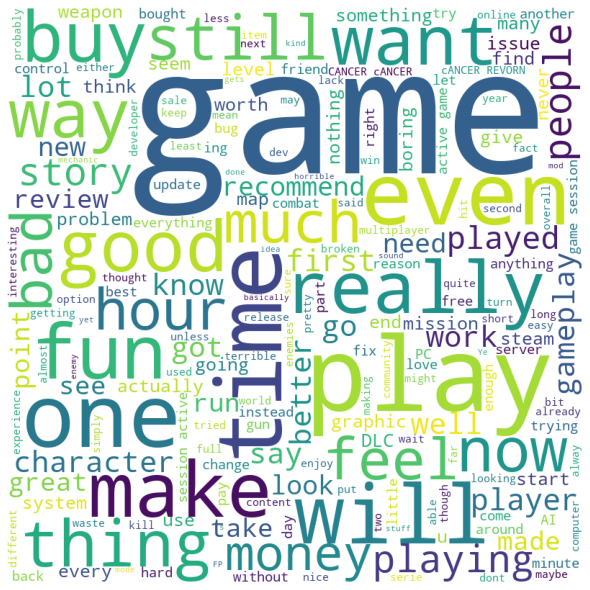

In [104]:
# get only the negative reviews
negative_texts = reviews[reviews['review_score'] == -1]['review_text']
negative_texts = ' '.join(negative_texts)

# make wordcloud from the negative review texts
generate_wordcloud(negative_texts)